### How to load the data

This jupyter notebook demonstrates how to access the data of the dataset. To run the notebook you will need to install the following packages:
- pymef (to read MEF3 format)
- pybids (to load the BIDS data structure)


Let's do the imports first

In [1]:
import os

from pymef import MefSession
from bids import BIDSLayout

import numpy as np
import matplotlib.pyplot as plt


Now load the BIDS dataset

In [2]:
path_to_dataset = r"C:\MasterThesis\v1.0"  # Please change this value
# path_to_dataset = '/media/jan_cimbalnik/DATADRIVE1/mayo_memory_dataset/'  # Please change this value

l = BIDSLayout(path_to_dataset)

Define what data we want to load

In [3]:
filter_dictionary = {'subject': '004',
                     'session': '001',
                     'task': 'FR',
                     'run': 1,
                     'suffix': 'ieeg',
                     'extension': 'json'}
json_files = l.get(**filter_dictionary)

# We now we have requested only one file now but multiple files can be processed in a for loop
json_file = json_files[0]
print(json_file)

json_entities = json_file.entities

<BIDSJSONFile filename='C:\MasterThesis\v1.0\sub-004\ses-001\ieeg\sub-004_ses-001_task-FR_run-01_ieeg.json'>


Load the information about electrodes

In [4]:
# Get electrodes
electrodes_file = l.get(suffix='electrodes', extension='tsv',
                        subject=json_entities['subject'],
                        session=json_entities['session'])[0]
electrode_df = electrodes_file.get_df()
electrode_df

,name,x,y,z,size,material,manufacturer,group,type,anatomy_structure
0,LZ_01,4.2,15.6,68.1,2,Pt,PMT,LZ,ring,wm
1,LZ_10,-26.6,17.0,85.0,2,Pt,PMT,LZ,ring,precentral gyrus
2,LAM_08,-31.5,-46.3,66.8,2,Pt,PMT,LAM,ring,middle temporal gyrus
3,LAM_09,-34.4,-48.0,68.8,2,Pt,PMT,LAM,ring,middle temporal gyrus
4,LAM_10,-37.2,-49.7,70.8,2,Pt,PMT,LAM,ring,middle temporal gyrus
...,...,...,...,...,...,...,...,...,...,...
123,LAM_03,-17.3,-38.0,56.6,2,Pt,PMT,LAM,ring,wm
124,LAM_04,-20.1,-39.6,58.7,2,Pt,PMT,LAM,ring,middle temporal gyrus
125,LAM_05,-23.0,-41.3,60.7,2,Pt,PMT,LAM,ring,middle temporal gyrus
126,LAM_06,-25.8,-43.0,62.7,2,Pt,PMT,LAM,ring,middle temporal gyrus


Load information about channels

In [5]:
# Get channels
channel_file = l.get(suffix='channels', extension='tsv',
                     task=json_entities['task'],
                     subject=json_entities['subject'],
                     session=json_entities['session'],
                     run=json_entities['run'])[0]
channel_df = channel_file.get_df()
channel_df
    

,name,type,units,low_cutoff,high_cutoff,reference,sampling_frequency,status,status_description
0,LAM_01,SEEG,µV,0.1,6000.0,scalp_cpz,32000,good,NaN
1,LAM_02,SEEG,µV,0.1,6000.0,scalp_cpz,32000,bad,broken
2,LAM_03,SEEG,µV,0.1,6000.0,scalp_cpz,32000,good,NaN
3,LAM_04,SEEG,µV,0.1,6000.0,scalp_cpz,32000,good,NaN
4,LAM_05,SEEG,µV,0.1,6000.0,scalp_cpz,32000,good,NaN
...,...,...,...,...,...,...,...,...,...
132,RIGHT_PUPIL_SIZE,PUPIL,px2,NaN,NaN,scalp_cpz,150,good,NaN
133,RIGHT_X_COORD,EYEGAZE,px,NaN,NaN,scalp_cpz,150,good,NaN
134,RIGHT_Y_COORD,EYEGAZE,px,NaN,NaN,scalp_cpz,150,good,NaN
135,SCREEN_X,EYEGAZE,px,NaN,NaN,scalp_cpz,150,good,NaN


Load events

In [6]:
events_file = l.get(suffix='events', extension='tsv',
                    task=json_entities['task'],
                    subject=json_entities['subject'],
                    session=json_entities['session'],
                    run=json_entities['run'])[0]
events_df = events_file.get_df()

# Pull only the processed events (discarding the original events)
events_df = events_df.loc[~events_df['trial_type'].isna(), ['onset', 'sample', 'duration', 'trial_type', 'list']]
events_df


,onset,sample,duration,trial_type,list
587,367.779946,11768958,0.99000,COUNTDOWN,1.0
588,368.769946,11800638,0.99900,COUNTDOWN,1.0
589,369.768946,11832606,1.00100,COUNTDOWN,1.0
590,370.769946,11864638,1.00000,COUNTDOWN,1.0
591,371.769946,11896638,1.00703,COUNTDOWN,1.0
...,...,...,...,...,...
994,1868.026535,59776849,0.00000,RECALL,14.0
995,1960.507121,62736227,0.00000,RECALL,15.0
996,1979.907121,63357027,0.00000,RECALL,15.0
997,1961.807121,62777827,0.00000,RECALL,15.0


Now load the raw data

In [7]:
# Since we are using MEF3 pybids has problems recognizing the extension so we need to modify the json extension
mef_session_path = os.path.splitext(json_file.path)[0]+'.mefd'
ms = MefSession(mef_session_path, None)

Now load the data as they are presented in the manuscript Figure 3

In [8]:
channels = ['LEFT_PUPIL_SIZE', 'RIGHT_PUPIL_SIZE',  # Eye tracking
            'MIC',  # Audio
            'LK_02', 'LAM_03', 'LAM_04'  # iEEG
           ]

start_time = 1553941347170839+3*1e6
win_size = 6  # in seconds
stop_time = start_time + int(win_size*1e6)

data = ms.read_ts_channels_uutc(channels, [start_time, stop_time])
bi = ms.read_ts_channel_basic_info()

# In this case we are reading MEF records instead of data from events.tsv because we do not have to make time conversions this way
records = ms.read_records()
records_in_win = [x for x in records if start_time < x['time'] < stop_time]

# The code to get corresponding events from the events file
session_metadata = ms.session_md
session_start_utc = session_metadata['session_specific_metadata']['earliest_start_time'][0]
events_df['microsecond_onset'] = events_df['onset']*1e6
events_df['uutc'] = (events_df['microsecond_onset'] + session_start_utc).astype('int')

events_in_win = events_df[(start_time < events_df['uutc'])
                          & (events_df['uutc'] < stop_time)]


Finally plot the data

Text(0.5, 0, 'Time [s]')

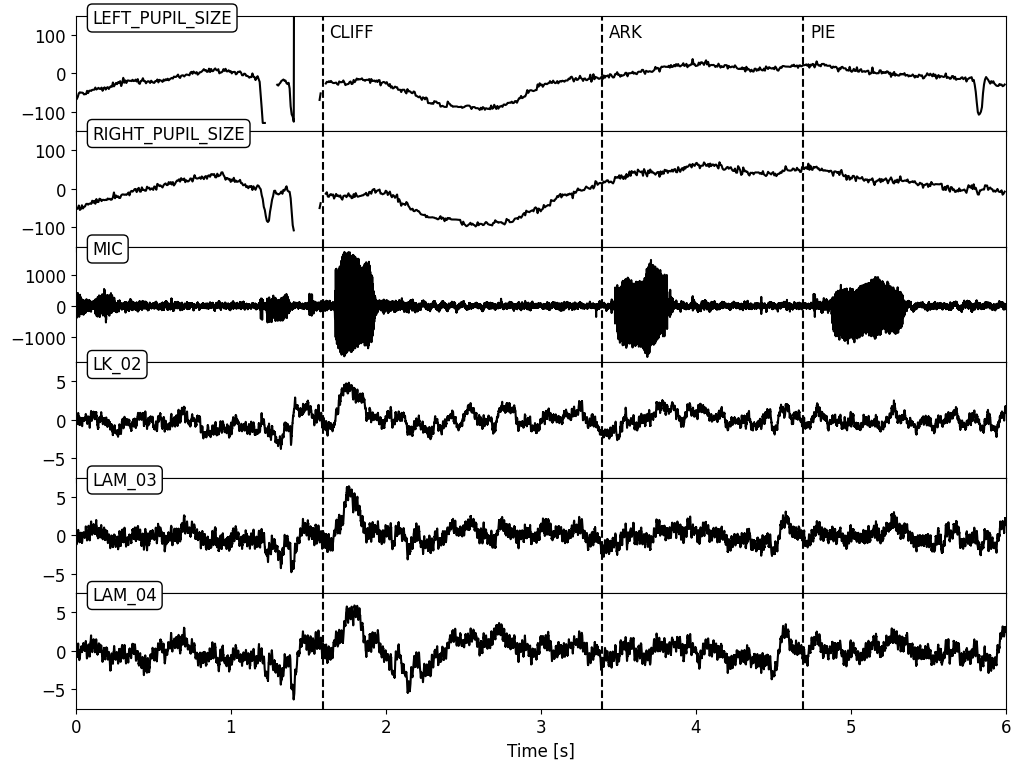

In [9]:
# %% Plot
f, ax_arr = plt.subplots(len(channels),
                         gridspec_kw={'hspace': 0.0}, sharex=True,
                         figsize=(12, 9))

for ax, ch, ch_data in zip(ax_arr, channels, data):
    
    detrended_data = ch_data - np.nanmean(ch_data)
    
    # Pupil size channels
    if 'PUPIL' in ch:
        detrended_data *= np.pi
        detrended_data = detrended_data / 3000000
        
    # iEEG channels
    if 'PUPIL' not in ch and 'MIC' not in ch:
        detrended_data = detrended_data / 1000
    
    fs = [x for x in bi if x['name'] == ch][0]['fsamp'][0]
    unit = [x for x in bi if x['name'] == ch][0]['unit'][0]
    
    plt.sca(ax)
    
    x = np.arange(0, win_size, 1/fs)
    plt.plot(x, detrended_data, label=ch, color='k')
    
    ax.annotate(ch, xy=(12, 88), xycoords='axes points',
                size=12,
                ha='left', va='top',
                bbox=dict(boxstyle='round', fc='w'))
    
    # Pupil size channels
    if 'PUPIL' in ch:
        ax.set_ylim((-0.15*10e2, 0.15*10e2))
        
    # iEEG channels
    if 'PUPIL' not in ch and 'MIC' not in ch:
        ax.set_ylim((-7.5, 7.5))
            
    # Take care of records
    y_lim = ax.get_ylim()
    for rec in records_in_win:
        # Determine the sample
        
        samp = (rec['time'] - start_time)/1e6
        plt.plot([samp, samp], y_lim, 'k--')
        
        if ch == channels[0]:
            ax.annotate(rec['text'], xy=(samp, y_lim[1]),
                        size=12, va='top',
                        xytext=(5, -5), textcoords='offset points')
        
    ax.set_ylim(y_lim)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
plt.xlim((0, win_size))
plt.xlabel('Time [s]', fontsize=12)